In [58]:
from dataset import *

In [59]:
import random
import squarify
import matplotlib.pyplot as plt

In [60]:
total = get_trainsubset(index=0, random=False)

In [61]:
len(total)

88

In [62]:
total_ok_size = 0
num_total_ok_case = 0
num_not_total_case = 0
for item in total:
    if 'ok_length' in item.keys():
        total_ok_size += item['ok_length']
        num_not_total_case += 1
    else:
        total_ok_size += item['length']
        num_total_ok_case += 1


In [63]:
print(total_ok_size, num_total_ok_case, num_not_total_case)

697806 42 46


In [64]:
num_frame = total_ok_size / 8
num_frame

87225.75

In [65]:
testset_names = get_testset()

In [66]:
testset_names

[{'dirname': '200211_yjw'},
 {'dirname': '200121_smh'},
 {'dirname': '200102_jsyB'},
 {'dirname': '200103_5hyj_SD_ICA_hanrh'},
 {'dirname': '200424_T22_AV_hanrh'},
 {'dirname': '200424_T17_AV_hanrh'},
 {'dirname': '200121_jsh_ea'},
 {'dirname': '191231_koh_av'},
 {'dirname': '200211_ysy'},
 {'dirname': '200102_ybn'},
 {'dirname': '200121_yyh'}]

In [67]:
import os

In [68]:
tran_root = os.path.join('tensorflow-deeplab-v3', 'dataset', 'boramae', 'transformed_dir')

In [69]:
all_keys = metadata.keys()

In [70]:
test_size = 0
for name in testset_names:
    with open(os.path.join(tran_root, name['dirname'], name['dirname']+'_filelist.txt'), 'r') as fp:
        test_size += len(fp.readlines())

In [71]:
test_size

90129

In [72]:
test_size / 8

11266.125

In [73]:
def get_attr(total, attr_name):
    attrs = []
    for item in total:
        try:
            attrs.append(item[attr_name])
        except:
            print(item)
    return attrs

In [74]:
miscs = get_attr(total, 'misc')

In [75]:
len(miscs)

88

In [76]:
print(miscs)

[['dark', 'sparse'], ['unclear'], ['unclear', 'dark'], ['blur'], ['sparse', 'blur'], ['vein'], ['blur'], ['sparse'], ['blur', 'unclear'], ['unclear'], ['blur'], ['already', 'blur', 'sparse'], ['blur', 'dark'], ['blur', 'unclear', 'already'], ['dark', 'already'], [], [], ['blur'], [], [], [], [], [], [], ['hard'], [], [], [], ['blur'], [], ['unclear', 'blur'], [], [], ['blur'], ['overexposure'], [], [], ['sparse', 'segmented'], [], ['dark'], ['blur'], ['vein'], ['hard'], ['unclear'], ['blur'], ['blur', 'vein', 'unclear', 'hard'], ['dark'], ['vein', 'unclear'], ['already'], ['already'], ['already'], ['dark', 'blur'], [], [{'key': 'duplicate', 'value': '191123_8bAI_large ICA_EA_hanrh'}], ['already'], ['sparse', 'already'], ['already'], ['already'], ['already'], ['already'], ['blur'], ['already'], [], ['hard'], ['already'], ['vein'], ['sparse'], [], [], ['bad'], ['bad'], ['blur', 'already'], ['blur'], ['sparse'], ['hard'], ['dark'], ['blur'], ['dark', 'hard'], [], ['blur'], ['hard'], ['unc

In [77]:
def get_element(data):
    if not len(data):
        return []
    result = set()
    elements = {}
    for item in data:
        if type(item) == dict:
            for key in item.keys():
                if not key in elements.keys():
                    elements[key] = {'count': 1, 'name': key}
                else:
                    elements[key]['count'] += 1
        elif type(item) == list or type(item) == tuple:
            if not len(item):
                key = 'good'
                if not key in elements.keys():
                    elements[key] = {'count': 1, 'name': key}
                else:
                    elements[key]['count'] += 1          
                result.add(key)
            for value in item:
                if type(value) == dict:
                    result.add(value['key'])
                    if not value['key'] in elements.keys():
                        elements[value['key']] = {'count': 1, 'name': value['key']}
                    else:
                        elements[value['key']]['count'] += 1
                else: 
                    result.add(value)
                    if not value in elements.keys():
                        elements[value] = {'count': 1, 'name': value}
                    else:
                        elements[value]['count'] += 1
    return result, elements

In [78]:
misc_types, misc_elements = get_element(miscs)

In [79]:
def rename(elements, namemap):
    for key, value in elements.items():
        for n_key, name in namemap.items():
            if key == n_key:
                elements[key]['name'] = name

In [80]:
def add_desc(elements, descmap):
    for key, value in elements.items():
        for n_key, name in descmap.items():
            if key == n_key:
                elements[key]['description'] = name

In [81]:
descmap = {
    'unclear': 'anatomical structure not conspicuous',
    'bad': 'overall low image quality', 
    'hard': 'anatomical structure hard to recognition',
    'dark': 'underexposure',
    'sparse': 'too sparse vessel structures',
    'good': 'acceptable vessel images'
}

In [133]:
namemap = {
    'unclear': 'anatomical structure\n not conspicuous',
    'bad': 'overall low\n image quality', 
    'hard': 'anatomical structure\n too complex',
    'dark': 'underexposure',
    'sparse': 'anatomical structure\n too sparse',
    'good': 'overall high\n image quality',
    'already': 'image same\n origin video',
    'overexposure': 'overexp.',
    'blur': 'out of focus',
    'duplicate': 'temperal variaties',
    'segmented': 'fragmented',
    'vein': 'mainly focused vein'
}

In [134]:
rename(misc_elements, namemap)

In [135]:
misc_elements

{'dark': {'count': 12, 'name': 'underexposure'},
 'sparse': {'count': 8, 'name': 'anatomical structure\n too sparse'},
 'unclear': {'count': 10, 'name': 'anatomical structure\n not conspicuous'},
 'blur': {'count': 23, 'name': 'out of focus'},
 'vein': {'count': 5, 'name': 'mainly focused vein'},
 'already': {'count': 15, 'name': 'image same\n origin video'},
 'good': {'count': 22, 'name': 'overall high\n image quality'},
 'hard': {'count': 8, 'name': 'anatomical structure\n too complex'},
 'overexposure': {'count': 1, 'name': 'overexp.'},
 'segmented': {'count': 1, 'name': 'fragmented'}}

In [136]:
misc_elements = dict(filter(lambda item: item[0] != 'duplicate' and item[0] != 'bad', misc_elements.items()))
misc_types = set(misc_elements.keys())

In [137]:
misc_types

{'already',
 'blur',
 'dark',
 'good',
 'hard',
 'overexposure',
 'segmented',
 'sparse',
 'unclear',
 'vein'}

In [138]:
misc_elements

{'dark': {'count': 12, 'name': 'underexposure'},
 'sparse': {'count': 8, 'name': 'anatomical structure\n too sparse'},
 'unclear': {'count': 10, 'name': 'anatomical structure\n not conspicuous'},
 'blur': {'count': 23, 'name': 'out of focus'},
 'vein': {'count': 5, 'name': 'mainly focused vein'},
 'already': {'count': 15, 'name': 'image same\n origin video'},
 'good': {'count': 22, 'name': 'overall high\n image quality'},
 'hard': {'count': 8, 'name': 'anatomical structure\n too complex'},
 'overexposure': {'count': 1, 'name': 'overexp.'},
 'segmented': {'count': 1, 'name': 'fragmented'}}

In [139]:
counts = sorted(misc_elements.values(), key=lambda item: item['count'], reverse=True)

In [140]:
from functools import reduce

In [141]:
help(reduce)

Help on built-in function reduce in module _functools:

reduce(...)
    reduce(function, sequence[, initial]) -> value
    
    Apply a function of two arguments cumulatively to the items of a sequence,
    from left to right, so as to reduce the sequence to a single value.
    For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
    ((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
    of the sequence in the calculation, and serves as a default when the
    sequence is empty.



In [142]:
counts

[{'count': 23, 'name': 'out of focus'},
 {'count': 22, 'name': 'overall high\n image quality'},
 {'count': 15, 'name': 'image same\n origin video'},
 {'count': 12, 'name': 'underexposure'},
 {'count': 10, 'name': 'anatomical structure\n not conspicuous'},
 {'count': 8, 'name': 'anatomical structure\n too sparse'},
 {'count': 8, 'name': 'anatomical structure\n too complex'},
 {'count': 5, 'name': 'mainly focused vein'},
 {'count': 1, 'name': 'overexp.'},
 {'count': 1, 'name': 'fragmented'}]

In [143]:
len(counts)

10

In [144]:
reduce(lambda x, y: x + y, [item['count'] for item in counts])

105

In [145]:
def random_color_code():
    alphabet = list(range(10)) + list(map(lambda idx: chr(idx), range(97, 103)))
    cont = [str(random.choice(alphabet)) for d in range(6)] 
    return '#'+ ''.join(cont)

In [146]:
random_color_code()

'#9fd1bb'

In [147]:
import matplotlib as mpl

In [148]:
mpl.rcParams['figure.dpi'] = 300.

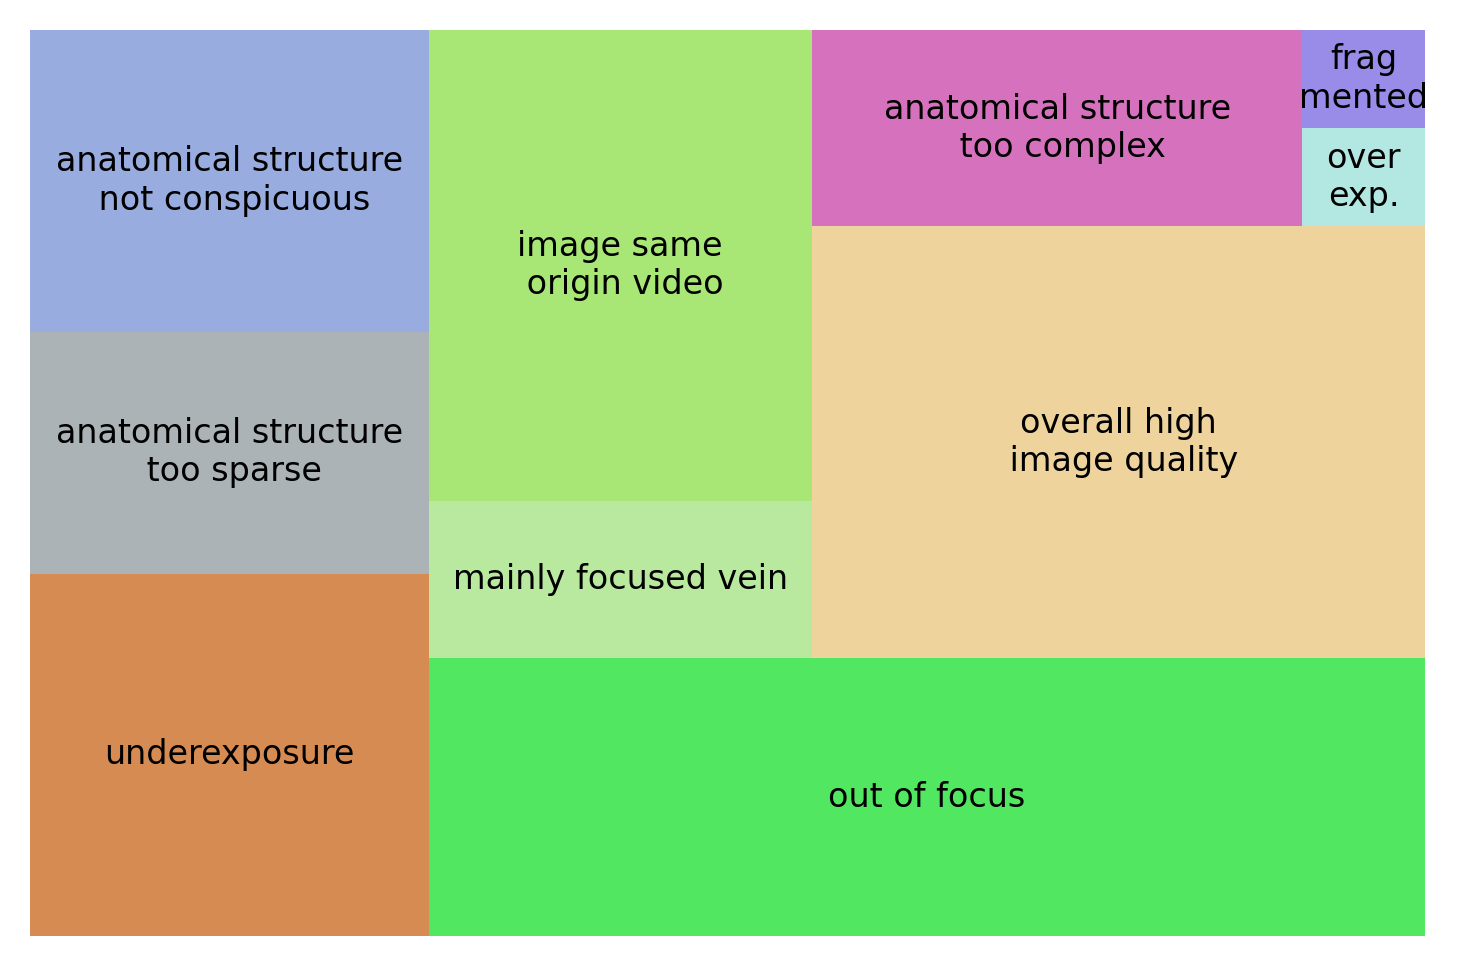

In [155]:
random_color_code()
volumes, labels, colors = [], [], []
for element in misc_elements.values():
    if element['name'] == 'duplicate': continue
    volumes.append(element['count'])
    if element['count'] <= 1: 
        labels.append(element['name'][:4] + '\n' + element['name'][4:])
    else:
        labels.append(element['name'])
    colors.append(random_color_code())
    
plt.rc('font', size=8)
squarify.plot(sizes=volumes, label=labels,
              color=colors, alpha=0.7)
plt.axis('off')

plt.show()

In [132]:
desc = {
	'already': {
		'name': 'already',
		'description_ko': '같은 영상에서 얻은 또다른 데이터가 있음.', 
		'description_en': 'Other data which extracts from same video exists.'},
	'bad': {
		'name': 'bad',
		'description_ko': '영상의 질이 전체적으로 나쁨.', 
		'description_en': 'Overall images quality is poor.'},
	'blur': {
		'name': 'blur',
		'description_ko': '주변 영상의 초점이 맞지 않아 흐릿함.', 
		'description_en': 'The periphery of the images is blurred.'}, 
	'overexposure': {
		'name': 'overexp.',
		'description_ko': '영상에서 타버린 스팟이 존재함.', 
		'description_en': 'There is a burnt spot in the images.'}, 
	'dark': {
		'name': 'dark',
		'description_ko': '영상이 전체적으로 어두움.', 
		'description_en': 'The pictures is generally dark.'}, 
	'duplicate': {
		'name': 'duplicate',
		'description_ko': '중복이라고 볼 수 있는 영상이 존재함.', 
		'description_en': 'There is an image that can be regarded as overlapping.'}, 
	'good': {
		'name': 'good',
		'description_ko': '영상에 나쁜 점이 없음.', 
		'description_en': 'Nothing bad about the images.'}, 
	'hard': {
		'name': 'hard',
		'description_ko': '대상의 주변이 복잡하고, 닮은 것이 있어 맞추기 어려워 보임.', 
		'description_en': 'The subject\'s surroundings are complex and seem difficult to match due to similarities.'}, 
	'segmented': {
		'name': 'segmented',
		'description_ko': '대상이 영상의 여러 부분에서 나타난다.', 
		'description_en': 'The object appears in various parts of the images.'}, 
	'sparse': {
		'name': 'sparse',
		'description_ko': '대상이 영상에서 아주 협소하게 나타난다.', 
		'description_en': 'The object appears very narrowly in the images.'}, 
	'unclear': {
		'name': 'unclear',
		'description_ko': '대상이 나타나지만, 불명확하게 나타난다.', 
		'description_en': 'The object appears, but indefinitely.'}, 
	'vein': {
		'name': 'vein',
		'description_ko': '주로 vein 에 대한 이미지들이다.', 
		'description_en': 'It\'s mainly image about vein.'}
}

In [43]:
namemap = {
    'unclear': 'anatomical structure not conspicuous',
    'bad': 'overall low image quality', 
    'hard': 'anatomical structure too complex',
    'dark': 'underexposure',
    'sparse': 'anatomical structure too sparse',
    'good': 'overall high image quality',
    'already': 'image same origin video',
    'overexposure': 'overexp.'
}

In [44]:
rename(desc, namemap)

In [45]:
for item in counts:
    item['name'] = item['name'].replace('\n', '')

In [46]:
counts

[{'count': 23, 'name': 'blur'},
 {'count': 22, 'name': 'overall high image quality'},
 {'count': 15, 'name': 'image same origin video'},
 {'count': 12, 'name': 'underexposure'},
 {'count': 10, 'name': 'anatomical structure not conspicuous'},
 {'count': 8, 'name': 'anatomical structure too sparse'},
 {'count': 8, 'name': 'anatomical structure too complex'},
 {'count': 5, 'name': 'vein'},
 {'count': 2, 'name': 'overall low image quality'},
 {'count': 1, 'name': 'overexp.'},
 {'count': 1, 'name': 'segmented'},
 {'count': 1, 'name': 'duplicate'}]

In [47]:
appendices = []
for item in desc.values():
    count = 0
    if item['name'] == 'duplicate': continue
    for c_item in counts:
        if item['name'] == c_item['name']:
            count = c_item['count']
            break
    appendices.append({
        'name': item['name'],
        'description': item['description_en'],
        'count': count,
        'percentile': round(count/88 * 100)
    })


In [48]:
appendices

[{'name': 'image same origin video',
  'description': 'Other data which extracts from same video exists.',
  'count': 15,
  'percentile': 17},
 {'name': 'overall low image quality',
  'description': 'Overall images quality is poor.',
  'count': 2,
  'percentile': 2},
 {'name': 'blur',
  'description': 'The periphery of the images is blurred.',
  'count': 23,
  'percentile': 26},
 {'name': 'overexp.',
  'description': 'There is a burnt spot in the images.',
  'count': 1,
  'percentile': 1},
 {'name': 'underexposure',
  'description': 'The pictures is generally dark.',
  'count': 12,
  'percentile': 14},
 {'name': 'overall high image quality',
  'description': 'Nothing bad about the images.',
  'count': 22,
  'percentile': 25},
 {'name': 'anatomical structure too complex',
  'description': "The subject's surroundings are complex and seem difficult to match due to similarities.",
  'count': 8,
  'percentile': 9},
 {'name': 'segmented',
  'description': 'The object appears in various parts

In [49]:
len(appendices)

11

In [50]:
reduce(lambda a, b: a+b, [item['count'] for item in appendices])

107

In [51]:
table_data = sorted(appendices, key=lambda item: item['count'], reverse=True)

In [52]:
table_data

[{'name': 'blur',
  'description': 'The periphery of the images is blurred.',
  'count': 23,
  'percentile': 26},
 {'name': 'overall high image quality',
  'description': 'Nothing bad about the images.',
  'count': 22,
  'percentile': 25},
 {'name': 'image same origin video',
  'description': 'Other data which extracts from same video exists.',
  'count': 15,
  'percentile': 17},
 {'name': 'underexposure',
  'description': 'The pictures is generally dark.',
  'count': 12,
  'percentile': 14},
 {'name': 'anatomical structure not conspicuous',
  'description': 'The object appears, but indefinitely.',
  'count': 10,
  'percentile': 11},
 {'name': 'anatomical structure too complex',
  'description': "The subject's surroundings are complex and seem difficult to match due to similarities.",
  'count': 8,
  'percentile': 9},
 {'name': 'anatomical structure too sparse',
  'description': 'The object appears very narrowly in the images.',
  'count': 8,
  'percentile': 9},
 {'name': 'vein',
  'de

In [53]:
!pip install python-docx

In [54]:
from docx import Document

document = Document()


In [55]:
# add table ------------------
table = document.add_table(12, 3)

# populate header row --------
heading_cells = table.rows[0].cells
heading_cells[0].text = 'type name'
heading_cells[1].text = 'description'
heading_cells[2].text = 'percentile'

# add a data row for each item
for item in table_data:
    cells = table.add_row().cells
    cells[0].text = item['name']
    cells[1].text = item['description']
    cells[2].text = str(item['percentile'])

In [56]:
document.save('test.docx')

In [57]:
help(document.save)

Help on method save in module docx.document:

save(path_or_stream) method of docx.document.Document instance
    Save this document to *path_or_stream*, which can be either a path to
    a filesystem location (a string) or a file-like object.

